## Importing the packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', font_scale=1.25)

warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import pickle

## UDF

In [3]:
def conti_var_summary(x):
    '''
    UDF for getting customised summary for continuous variables
    '''
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total

    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr

    return pd.Series([
        x.dtype,
        x.nunique(), n_total,
        x.count(), n_miss, perc_miss,
        x.sum(),
        x.mean(),
        x.std(),
        x.var(), lc_iqr, uc_iqr,
        x.min(),
        x.quantile(0.01),
        x.quantile(0.05),
        x.quantile(0.10),
        x.quantile(0.25),
        x.quantile(0.5),
        x.quantile(0.75),
        x.quantile(0.90),
        x.quantile(0.95),
        x.quantile(0.99),
        x.max()
    ],
        index=[
        'dtype', 'cardinality', 'n_tot', 'n', 'nmiss',
        'perc_miss', 'sum', 'mean', 'std', 'var', 'lc_iqr',
        'uc_iqr', 'min', 'p1', 'p5', 'p10', 'p25', 'p50',
                         'p75', 'p90', 'p95', 'p99', 'max'
    ])

## Importing Data

In [4]:
df_salary = pd.read_excel('./Salary.xlsx')

In [5]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  86 non-null     float64
 1   Salary           86 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 KB


In [6]:
df_salary.head()

,YearsExperience,Salary
0,1.1,10000
1,1.3,10500
2,1.5,11000
3,2.0,11500
4,2.2,12000


In [7]:
df_salary.nunique()

YearsExperience    84
Salary             81
dtype: int64

## Data Summary

In [8]:
df_salary.apply(conti_var_summary)

,YearsExperience,Salary
dtype,float64,int64
cardinality,84,81
n_tot,86,86
n,86,86
nmiss,0,0
perc_miss,0.0,0.0
sum,1470.266667,9011950
mean,17.096124,104790.116279
std,10.623181,57680.123097
var,112.851972,3326996600.503967


In [9]:
df_salary.shape

(86, 2)

## Checking Correlation

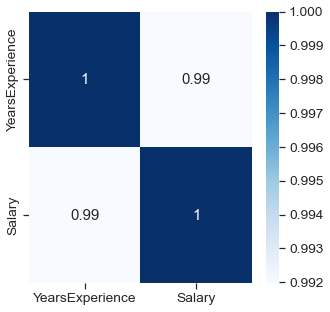

In [10]:
# Using Pearson Correlation
plt.figure(figsize=(5, 5))
cor = df_salary.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

## Plots

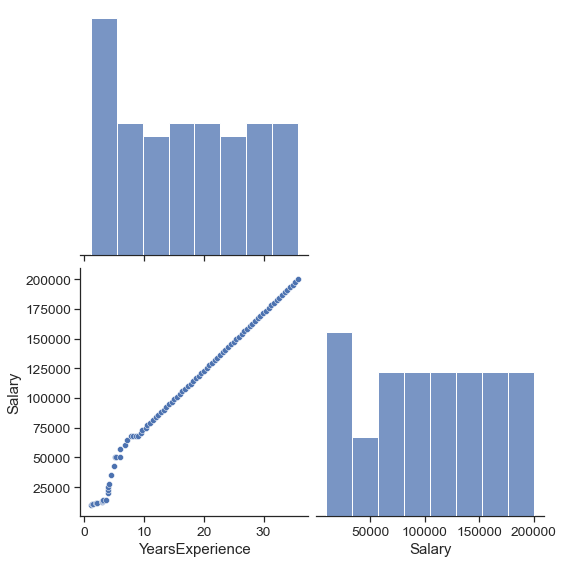

In [11]:
# Using Pairplot to check histograms and relation between two variables
sns.pairplot(df_salary, diag_kind='hist', corner=True, height=4, aspect=1)
plt.show()

-0.12710762396898892


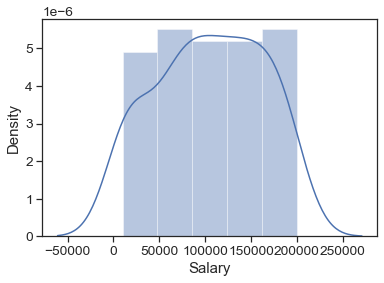

In [12]:
# Checking the Skewness of the Salary Column
print(df_salary.Salary.skew())
sns.distplot(df_salary.Salary)
plt.show()

The distribution is close to a normal distribution. So, no transformation is required.

## Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df_salary.iloc[:, :-1].values,
    df_salary.iloc[:, 1].values,
    test_size=0.3,
    random_state=2)

## Building the model

In [14]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [15]:
# Getting the Intersept and the Coefficient
print('b0 = ', lrm.intercept_, ', b1 = ', lrm.coef_[0], sep='')

b0 = 11593.106509913108, b1 = 5435.5261671068765


## Predicting the output on train and test

In [16]:
y_train_predicted = lrm.predict(X_train)
y_test_predicted = lrm.predict(X_test)

## Model Evaluation

In [17]:
def eval_fun(y_train, y_test, y_train_predicted, y_test_predicted):
    '''
    This function calculates and saves all the evaluation parameters viz. 
    MAPE, MSE, RMSE, MAE, R2 in a dataframe.
    '''

    # MAPE = Mean Absolute Percentage Error
    mape_train = mean_absolute_percentage_error(y_train, y_train_predicted)
    mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)
    mape = [mape_train, mape_test]

    # MSE - Mean squared Error
    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    mse = [mse_train, mse_test]
    rmse = [np.sqrt(mse_train), np.sqrt(mse_test)]
    mean = [y_train.mean(), y_test.mean()]

    # MAE - Mean Absolute Error
    mae_train = mean_absolute_error(y_train, y_train_predicted)
    mae_test = mean_absolute_error(y_test, y_test_predicted)
    mae = [mae_train, mae_test]

    # R² Value
    r2_train = r2_score(y_train, y_train_predicted)
    r2_test = r2_score(y_test, y_test_predicted)
    r2 = [r2_train, r2_test]

    pd.options.display.float_format = '{:.2f}'.format
    df_eval = pd.DataFrame(
        list(zip(mape, mse, rmse, mean, mae, r2)),
        columns=['MAPE', 'MSE', 'RMSE', 'mean', 'MAE', 'R2'],
        index=['Train', 'Test']).T
    return df_eval

In [18]:
eval_fun(y_train, y_test, y_train_predicted, y_test_predicted)

,Train,Test
MAPE,0.20,0.14
MSE,56936899.75,43712136.57
RMSE,7545.65,6611.52
mean,105274.40,103672.54
MAE,6161.91,5416.27
R2,0.98,0.99


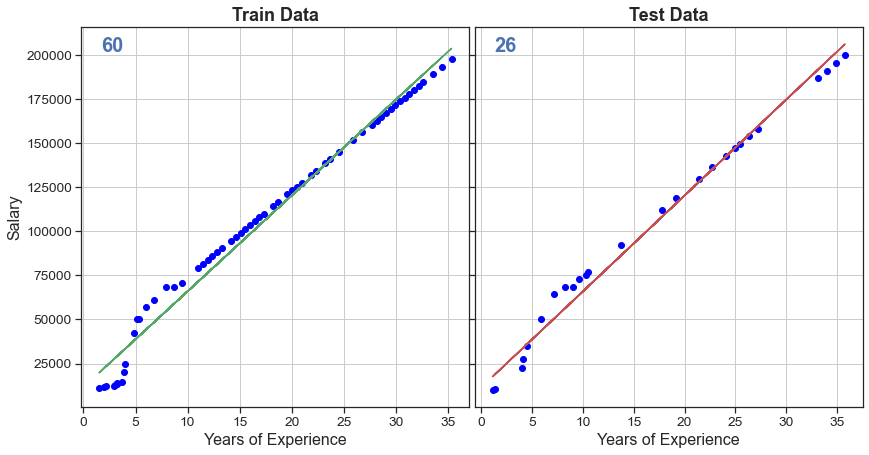

In [19]:
params = {'figure.figsize': (14, 7), 'axes.labelsize': 16}
plt.rcParams.update(params)
fig, axs = plt.subplots(1, 2, sharey=True)
plt.subplots_adjust(wspace=0.015, hspace=0)
# Train
axs[0].scatter(X_train, y_train, color='blue')
axs[0].plot(X_train, y_train_predicted, color='g')
axs[0].set_title('Train Data', fontdict={'fontsize': 18, 'fontweight': 'bold'})
axs[0].grid()
axs[0].set_ylabel('Salary')
axs[0].set_xlabel('Years of Experience')
axs[0].text(0.08,
            0.95,
            str(X_train.size),
            horizontalalignment='center',
            verticalalignment='center',
            transform=axs[0].transAxes,
            fontsize=20,
            fontweight='bold',
            color='b')
# Test
axs[1].scatter(X_test, y_test, color='blue')
axs[1].plot(X_test, y_test_predicted, color='r')
axs[1].set_title('Test Data', fontdict={'fontsize': 18, 'fontweight': 'bold'})
axs[1].grid()
axs[1].set_xlabel('Years of Experience')
axs[1].text(0.08,
            0.95,
            str(X_test.size),
            horizontalalignment='center',
            verticalalignment='center',
            transform=axs[1].transAxes,
            fontsize=20,
            fontweight='bold',
            color='b')

plt.show()

## Saving the model

In [20]:
filename = 'LinearRegression_model_Salary_Prediction.pkl'
pickle.dump(lrm, open(filename, 'wb'))

## Deploying model to test with new data

In [21]:
# Creating New Data
x_new = np.array([5, 10, 35, 60]).reshape(-1, 1)

# Retriving Model
retrived_model = pickle.load(open(filename, 'rb'))

# Predicting for New Data
retrived_model.predict(x_new)

array([ 38770.73734545,  65948.36818098, 201836.52235865, 337724.67653633])

In [22]:
# Validation
lrm.predict(x_new)

array([ 38770.73734545,  65948.36818098, 201836.52235865, 337724.67653633])